In [104]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [105]:
data = pd.read_csv("device_data.csv")

In [106]:
data

,id,date,h_humidity,h_temperature,a_humidity,a_temperature,a_voc,w_temperature,w_alarm
0,17,2024-04-10 10:50:13.836067+00:00,39.0,22.9,38.3,22.6,2239,19.8,True
1,33,2024-04-10 11:10:14.782679+00:00,39.0,22.8,38.5,22.5,89,20.1,True
2,51,2024-04-03 15:16:30.862480+00:00,39.0,22.8,44.2,22.5,9585,25.2,True
3,67,2024-04-03 15:23:01.147618+00:00,39.0,25.8,35.6,25.0,791,22.1,True
4,83,2024-04-03 15:42:55.101740+00:00,34.0,25.7,33.7,25.0,0,19.2,True
...,...,...,...,...,...,...,...,...,...
4768,77936,2024-05-25 16:04:57.841087+00:00,45.0,25.4,44.6,24.9,95,21.4,False
4769,77956,2024-05-25 16:33:55.436752+00:00,45.0,25.5,44.5,24.9,84,21.4,False
4770,77973,2024-05-25 16:55:00.105988+00:00,45.0,25.5,44.4,24.9,80,21.4,False
4771,77993,2024-05-25 17:24:57.867463+00:00,45.0,25.5,44.2,24.9,85,21.4,False


In [107]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4773 entries, 0 to 4772
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             4773 non-null   int64  
 1   date           4773 non-null   object 
 2   h_humidity     4773 non-null   float64
 3   h_temperature  4773 non-null   float64
 4   a_humidity     4773 non-null   float64
 5   a_temperature  4773 non-null   float64
 6   a_voc          4773 non-null   int64  
 7   w_temperature  4773 non-null   float64
 8   w_alarm        4773 non-null   bool   
dtypes: bool(1), float64(5), int64(2), object(1)
memory usage: 303.1+ KB


In [108]:
data.dropna(inplace=True)

In [109]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4773 entries, 0 to 4772
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             4773 non-null   int64  
 1   date           4773 non-null   object 
 2   h_humidity     4773 non-null   float64
 3   h_temperature  4773 non-null   float64
 4   a_humidity     4773 non-null   float64
 5   a_temperature  4773 non-null   float64
 6   a_voc          4773 non-null   int64  
 7   w_temperature  4773 non-null   float64
 8   w_alarm        4773 non-null   bool   
dtypes: bool(1), float64(5), int64(2), object(1)
memory usage: 303.1+ KB


In [110]:
from sklearn.model_selection import train_test_split

x = data['date']
# split the date into year, month, day
x = pd.to_datetime(x)
data['year'] = x.dt.year
data['month'] = x.dt.month
data['day'] = x.dt.day
data['hour'] = x.dt.hour
data=data.drop('date', axis=1)

# x have year month day
x = data[['year', 'month', 'day', 'hour']]
y = data.drop(['year', 'month', 'day', 'hour', 'id'], axis=1)

In [111]:
# from datetime import datetime

# x_formatted = []

# for idx, value in x.items():
#     formatted_date = datetime.strptime(value, "%Y-%m-%d %H:%M:%S.%f%z").strftime("%Y-%m-%d %H:%M:%S")
#     formatted_date = formatted_date.replace("-", "").replace(":", "").replace(" ", "")
#     x_formatted.append(formatted_date)

# x = pd.Series(x_formatted, name="date")
# x

In [112]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [113]:
train_data = y_train.join(x_train)

test_data = y_test.join(x_test)
# train_data.date.value_counts()

array([[<Axes: title={'center': 'h_humidity'}>,
        <Axes: title={'center': 'h_temperature'}>,
        <Axes: title={'center': 'a_humidity'}>],
       [<Axes: title={'center': 'a_temperature'}>,
        <Axes: title={'center': 'a_voc'}>,
        <Axes: title={'center': 'w_temperature'}>],
       [<Axes: title={'center': 'year'}>,
        <Axes: title={'center': 'month'}>,
        <Axes: title={'center': 'day'}>],
       [<Axes: title={'center': 'hour'}>, <Axes: >, <Axes: >]],
      dtype=object)

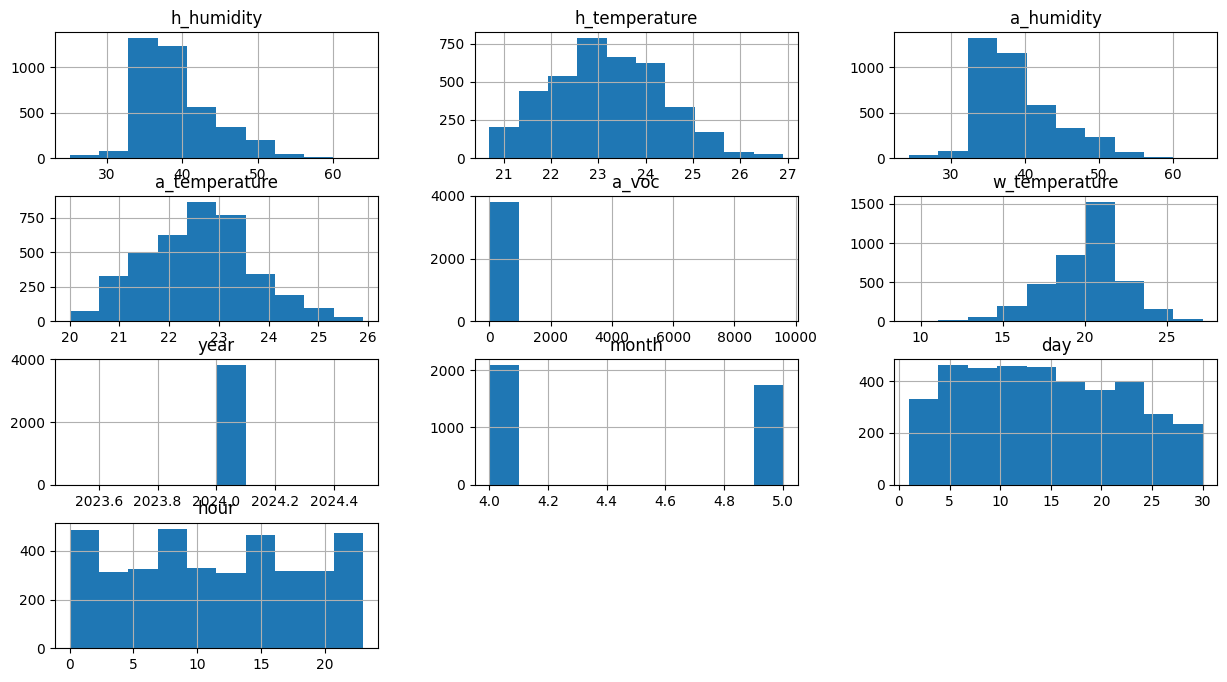

In [114]:
# train_data = train_data[~train_data['date'].isnull()]
# train_data['date'] = train_data['date'].astype(np.int64)

# test_data = test_data[~test_data['date'].isnull()]
# test_data['date'] = test_data['date'].astype(np.int64)

train_data.hist(figsize=(15, 8))

<Axes: >

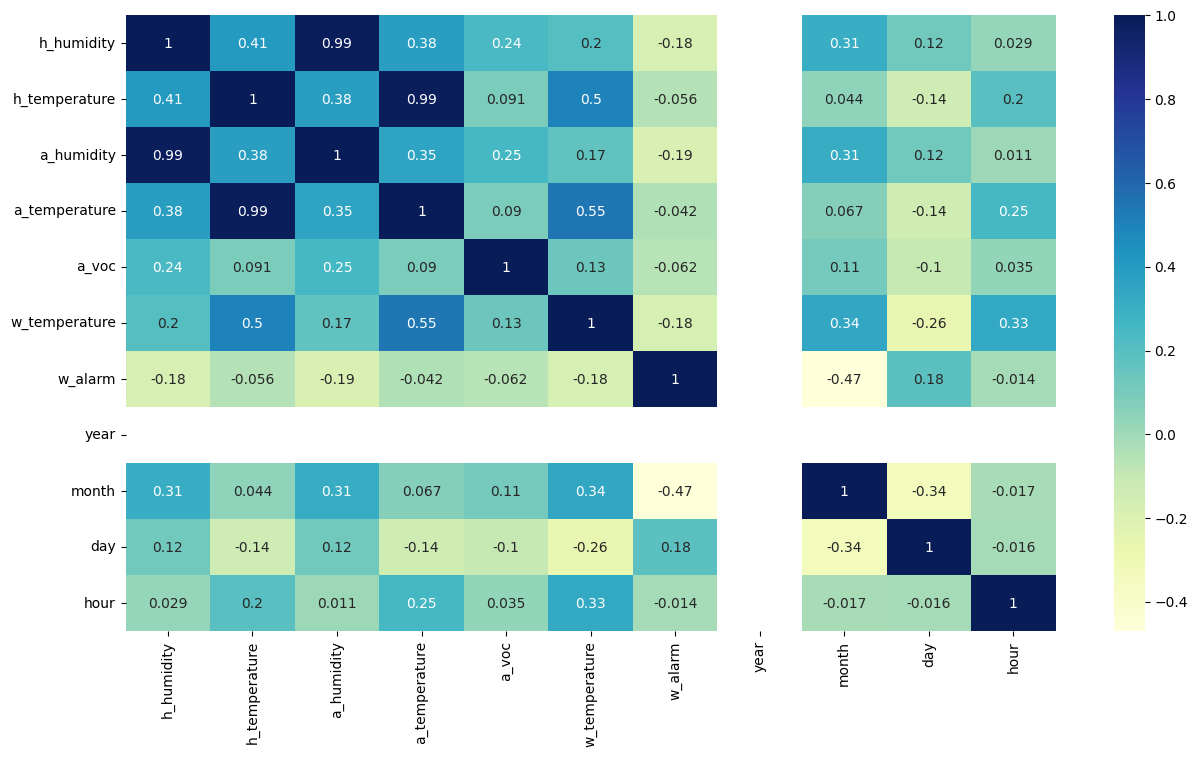

In [115]:
plt.figure(figsize=(15, 8))
sns.heatmap(train_data.corr(), annot=True, cmap="YlGnBu")

In [116]:
# train_data['a_voc'] = np.log(train_data['a_voc'] + 1)
# test_data['a_voc'] = np.log(test_data['a_voc'] + 1)

In [117]:
train_data.hist(figsize=(15,8))

array([[<Axes: title={'center': 'h_humidity'}>,
        <Axes: title={'center': 'h_temperature'}>,
        <Axes: title={'center': 'a_humidity'}>],
       [<Axes: title={'center': 'a_temperature'}>,
        <Axes: title={'center': 'a_voc'}>,
        <Axes: title={'center': 'w_temperature'}>],
       [<Axes: title={'center': 'year'}>,
        <Axes: title={'center': 'month'}>,
        <Axes: title={'center': 'day'}>],
       [<Axes: title={'center': 'hour'}>, <Axes: >, <Axes: >]],
      dtype=object)

In [ ]:
train_data = train_data.join(pd.get_dummies(train_data.w_alarm)).drop(['w_alarm'], axis=1)
test_data = test_data.join(pd.get_dummies(test_data.w_alarm)).drop(['w_alarm'], axis=1)

In [ ]:
test_data

,h_humidity,h_temperature,a_humidity,a_temperature,a_voc,w_temperature,year,month,day,hour,False,True
906,43.0,24.3,43.3,23.6,137,17.6,2024,4,13,1,False,True
4503,42.0,25.6,41.5,25.0,11,21.4,2024,5,21,18,True,False
3821,42.0,23.2,41.8,22.9,166,22.6,2024,5,12,14,False,True
3890,40.0,22.5,41.0,21.8,132,19.9,2024,5,13,7,False,True
2539,36.0,21.6,35.3,21.1,52,18.1,2024,4,30,1,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...
3542,51.0,23.5,51.1,22.8,283,19.8,2024,5,9,15,True,False
2959,35.0,22.2,35.0,21.8,70,21.4,2024,5,3,11,True,False
3311,38.0,23.0,37.9,22.5,125,19.5,2024,5,7,5,True,False
1383,37.0,23.7,37.1,22.9,35,13.6,2024,4,18,0,False,True


<Axes: >

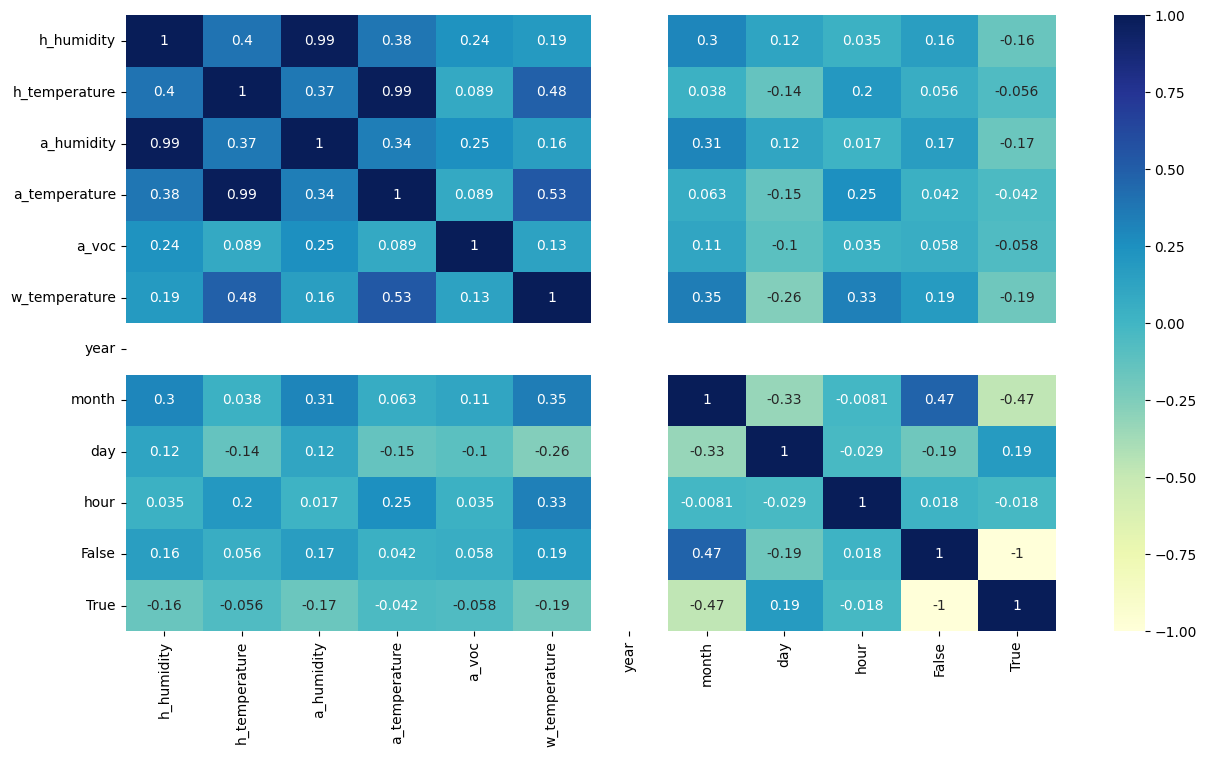

In [ ]:
plt.figure(figsize=(15, 8))
sns.heatmap(train_data.corr(), annot=True, cmap="YlGnBu")

In [ ]:
from sklearn.linear_model import LinearRegression

x_train, y_train = train_data[['year', 'month', 'day', 'hour']], train_data.drop(['year', 'month', 'day', 'hour'], axis = 1)
x_test, y_test = test_data[['year', 'month', 'day', 'hour']], test_data.drop(['year', 'month', 'day', 'hour'], axis = 1)

reg = LinearRegression()
x_train, y_train

(      year  month  day  hour
 2922  2024      5    3     1
 3683  2024      5   11     3
 4402  2024      5   20     7
 662   2024      4   10    12
 2630  2024      5    1     0
 ...    ...    ...  ...   ...
 4732  2024      5   25     3
 2840  2024      5    3     4
 1736  2024      4   21    16
 4348  2024      5   19     3
 1823  2024      4   22    14
 
 [3818 rows x 4 columns],
       h_humidity  h_temperature  a_humidity  a_temperature  a_voc  \
 2922        34.0           22.3        34.0           21.9     56   
 3683        45.0           23.3        45.5           22.6    244   
 4402        44.0           23.4        42.0           22.7    216   
 662         43.0           24.5        43.2           23.8    179   
 2630        35.0           21.9        34.8           21.5     24   
 ...          ...            ...         ...            ...    ...   
 4732        46.0           25.1        46.0           24.3     86   
 2840        36.0           21.9        35.4        

In [ ]:
# convert x_train from a Series to a DataFrame with one column
# x_train = x_train.to_frame()

reg.fit(x_train, y_train)

LinearRegression()

In [ ]:
reg.score(x_test, y_test)

0.15553458471428222

In [ ]:
import joblib

# joblib.dump(reg, 'model.pkl')

In [ ]:
# model = joblib.load('model.pkl')
# x_test.to_frame()
# model.predict([[2024, 6, 18, 4]])
# h_humidity	h_temperature	a_humidity	a_temperature	a_voc	w_temperature	date

In [ ]:
from sklearn.ensemble import RandomForestRegressor

random_forest = RandomForestRegressor()

random_forest.fit(x_train, y_train)
random_forest.score(x_test, y_test)

joblib.dump(random_forest, 'model.pkl')

['model.pkl']